### Pandas and Excel

In [3]:
import pandas as pd
from pandas import ExcelWriter

In [4]:
a = pd.DataFrame({'A': range(0, 4), 'B': range(5, 9)})
b = pd.DataFrame({'C': range(10, 20), 'D': range(20, 30)})

In [5]:
writer = ExcelWriter('test_output.xlsx')
for n, df in enumerate([a, b]):
    df.to_excel(writer, 'sheet%s' % str(n + 1))
writer.save()

### Домашнее задание 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z.

In [7]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [8]:
res = x + 2*y + 3*z
print(res)

[5 7]


In [9]:
all_points = np.stack((x,y,z,res))
all_points

array([[1, 1],
       [2, 0],
       [0, 2],
       [5, 7]])

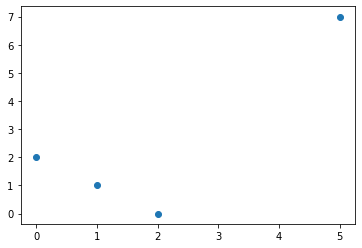

In [10]:
plt.scatter(all_points[:,0], all_points[:,1])
plt.show()

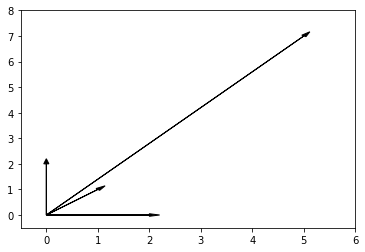

In [16]:
ax = plt.axes()

plt.xlim( [-0.5, 6] )
plt.ylim( [-0.5, 8] )

for i in range(len(all_points)):
    ax.arrow(0, 0, all_points[i][0], all_points[i][1], head_width=0.1, head_length=0.2, fc='k', ec='k')
plt.show()

### Матрица корреляций

Статистические тесты

In [25]:
import seaborn as sns
from sklearn import preprocessing

In [26]:
dataset_temp=pd.read_csv('data/faults.csv') 
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [27]:
data = dataset_temp.iloc[:,:27]
data[:4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212


In [28]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


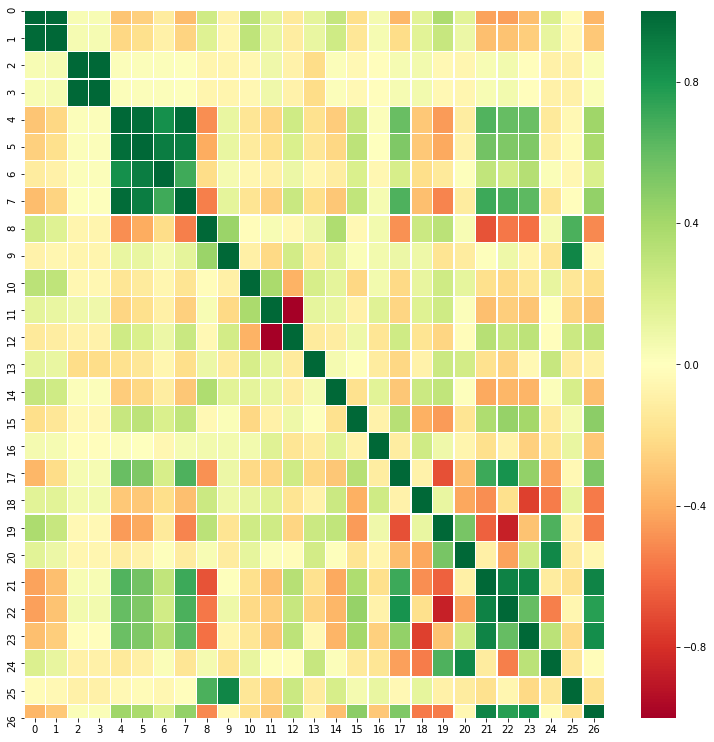

In [30]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_norm.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)

In [35]:
principalComponents = pca.fit_transform(df_norm)
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_' + str(i) for i in range(15)])

In [36]:
projected_x

,atribute_0,atribute_1,atribute_2,atribute_3,atribute_4,atribute_5,atribute_6,atribute_7,atribute_8,atribute_9,atribute_10,atribute_11,atribute_12,atribute_13,atribute_14
0,1.478376,-0.522152,1.685914,-0.558896,-0.437088,-0.771238,0.515761,0.433426,-0.242035,-0.452852,-0.201779,-0.012263,0.091668,-0.127251,-0.158963
1,2.082382,-0.791228,0.437233,-0.087769,0.605990,-0.742511,0.136537,0.634166,-0.242108,-0.175894,0.156606,0.322631,-0.104273,0.160537,-0.287218
2,2.283500,-0.797294,-0.091467,-0.092729,0.879542,-0.603849,0.094551,0.377180,-0.320074,0.169322,0.004485,0.272532,-0.036991,0.130893,-0.328533
3,-0.544140,-1.806336,-0.484384,0.116968,0.600520,-1.216713,0.278330,-0.823099,0.623369,0.653212,0.008744,0.257750,0.069616,0.148448,-0.197002
4,-1.143168,-1.754546,0.553648,1.445238,-0.365663,-0.746327,-0.124237,-0.532272,0.469312,0.120361,-0.424483,0.053998,0.184231,0.235634,-0.058526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-1.412316,0.924409,-0.533042,-0.322839,0.212864,-0.166363,-0.045618,-0.298352,-0.151384,-0.459088,-0.049571,-0.195435,0.143195,-0.248706,0.224754
1937,-1.533986,1.091324,-0.345885,-0.377878,-0.038876,-0.182546,0.025677,-0.192503,-0.092920,-0.259746,-0.161076,-0.448854,-0.074292,-0.209040,0.079259
1938,-1.450759,1.079281,-0.522487,-0.502284,-0.124436,-0.260006,0.019416,-0.108215,-0.181077,-0.211106,-0.122670,-0.362794,0.176764,-0.259959,0.072329
1939,-1.696445,0.950379,0.099427,-0.216261,0.242213,0.557857,0.032553,-0.722638,0.082826,-0.781905,0.139052,-0.413537,-0.037454,-0.253479,-0.033483


### Autoencoder

![title](data/autoencoder.png)